In [1]:
%matplotlib inline

In [2]:
from plotting_helper import *;

# Visualizing z-transforms in the the complex plane

These notes [(pdf)](https://michaelerule.github.io/publications/notes/course%20notes/cambridge/3f1/20200201_mrule_visualizing_z_transforms.pdf), along with the script [plotting_helper.py](https://michaelerule.github.io/publications/notes/course%20notes/cambridge/3f1/plotting_helper.py), are available as an [ipython notebook](https://michaelerule.github.io/publications/notes/course%20notes/cambridge/3f1/20200201_Visualizing_z_transforms.ipynb) on [Github](https://michaelerule.github.io/publications/notes/course%20notes/cambridge/3f1/index.html).

## Polar and rectangular coordinates

Recall the rectangular $z=x+ iy$ and polar $z=r e^{i\theta}$ forms of a complex number.

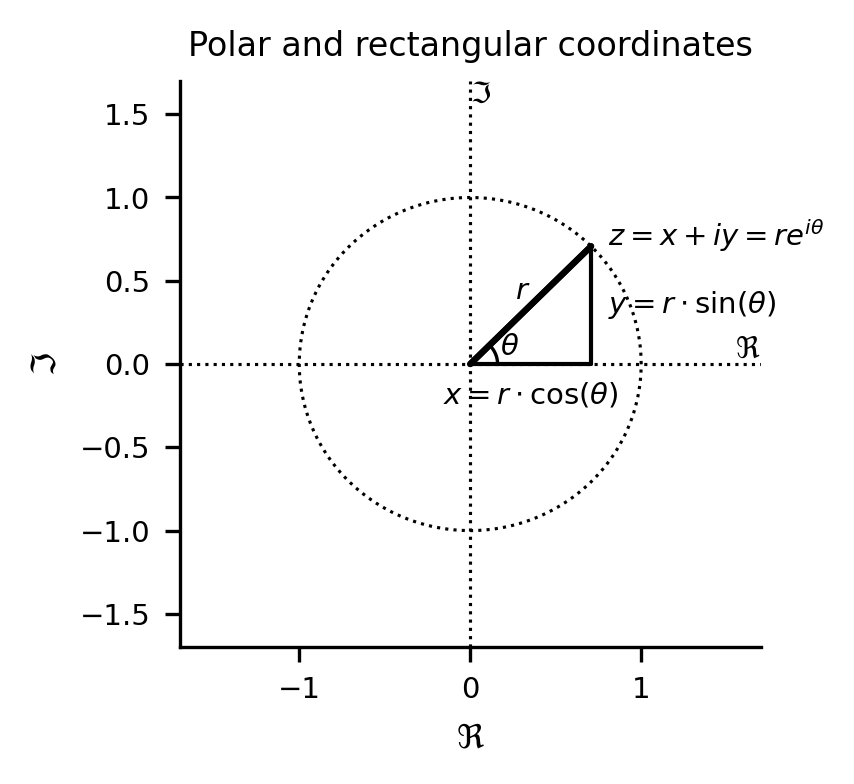

In [19]:
figure(figsize=(2.5,2.5))
add_complex_axes(color='k',limits=[(-1.7,1.7),(-1.7,1.7)])
c = sqrt(2)/2
plot([0,c],[0,c],color='k')
plot([0,c],[0,c],color='k')
plot([c,c],[0,c],color='k',lw=1)
plot([0,c],[0,0],color='k',lw=1)
title('Polar and rectangular coordinates')
text(c+0.1,c,r'$z = x + i y = r e^{i\theta}$')
text(c+0.1,c/2,r'$y=r\cdot\sin(\theta)$',va='center')
text(c/2,-0.1,r'$x=r\cdot\cos(\theta)$',va='top',ha='center')
text(c/2,c/2,r'$r$',ha='right',va='bottom')
text(c/4,c/3.8,r'$\theta$',va='top')
arc = exp(1j*linspace(0,pi/4,100))*0.16
plot(arc.real,arc.imag,lw=0.8,color='k');
xlabel('$\Re$')
ylabel('$\Im$');

## Coloring the points in the complex plane

The two maps below are colored representations of the magnitude (left) and phase (right) in polar coordinates. Observe that the phase rotates $2\pi$ around zero. To connect this to the analysis of poles and zeros in our z-domain transfer function, we can think of these maps as coloring the identity map. For example, it could be a z-domain transfer function of the form:
$$
U(z) = z
$$
This map has has one zero (at zero), and one pole (at infinity). 

**The way that phase behaves near 0 and $\infty$ in the identity map resembles the behavior of phase around zeros and poles in more complicated s-domain and z-domain transfer functions.** In the identity map, going around the origin counterclockwise adds $2\pi$ to the phase. This is equivalent to encircling infinity *clockwise*. In a transfer function, each zero (pole) can be viewed as a shifted (for poles: and inverted) version of the identity map. 

This allows us to determine the # of poles - # zeros by taking a closed contour integral in the complex plane, which can help us assess the stability of a sytem. For example, in continuous time we need there to be no poles in the right half plane. In discrete time, we need to check that there are no poles outside the unit circle. 

This follows from [Cauchy's argument principle](https://en.wikipedia.org/wiki/Argument_principle) and is important intution for understanding the [Nyquist stability criterion](https://en.wikipedia.org/wiki/Nyquist_stability_criterion) in both the continuous (s-domain) and discrete (z-domain). However, we do not need to go through the proof of the argument principle to understand it intuitively. 

In [4]:
# Define complex grid
x = linspace(-2,2,1001)
z = x[None,:] + 1j*x[:,None]
figure()
phase_magnitude_figure(z);

# Maps in the complex plane

By coloring points in the complex plane, we can visualize functions from $\mathbb C\to\mathbb C$

## A shift by 1 (zero at -1)

Note that the $2\pi$ phase rotation around the zero, located at -1

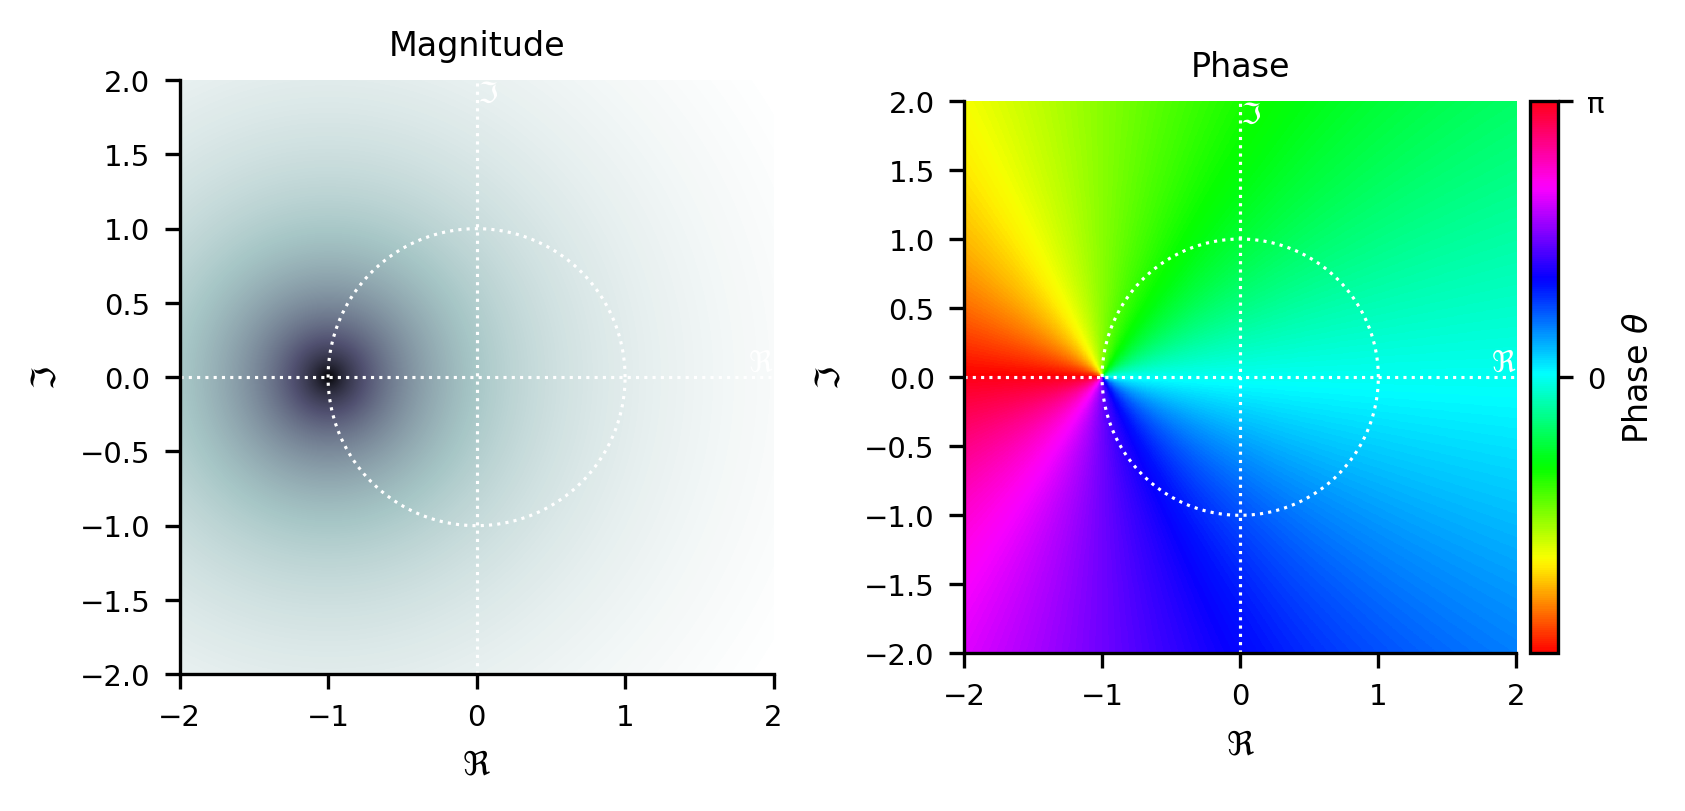

In [5]:
phase_magnitude_figure(z+1);

## Squaring (two zeros at zero)

Note that the phase rotation doubles, and is now $4\pi$ rather than $2\pi$ around zero.

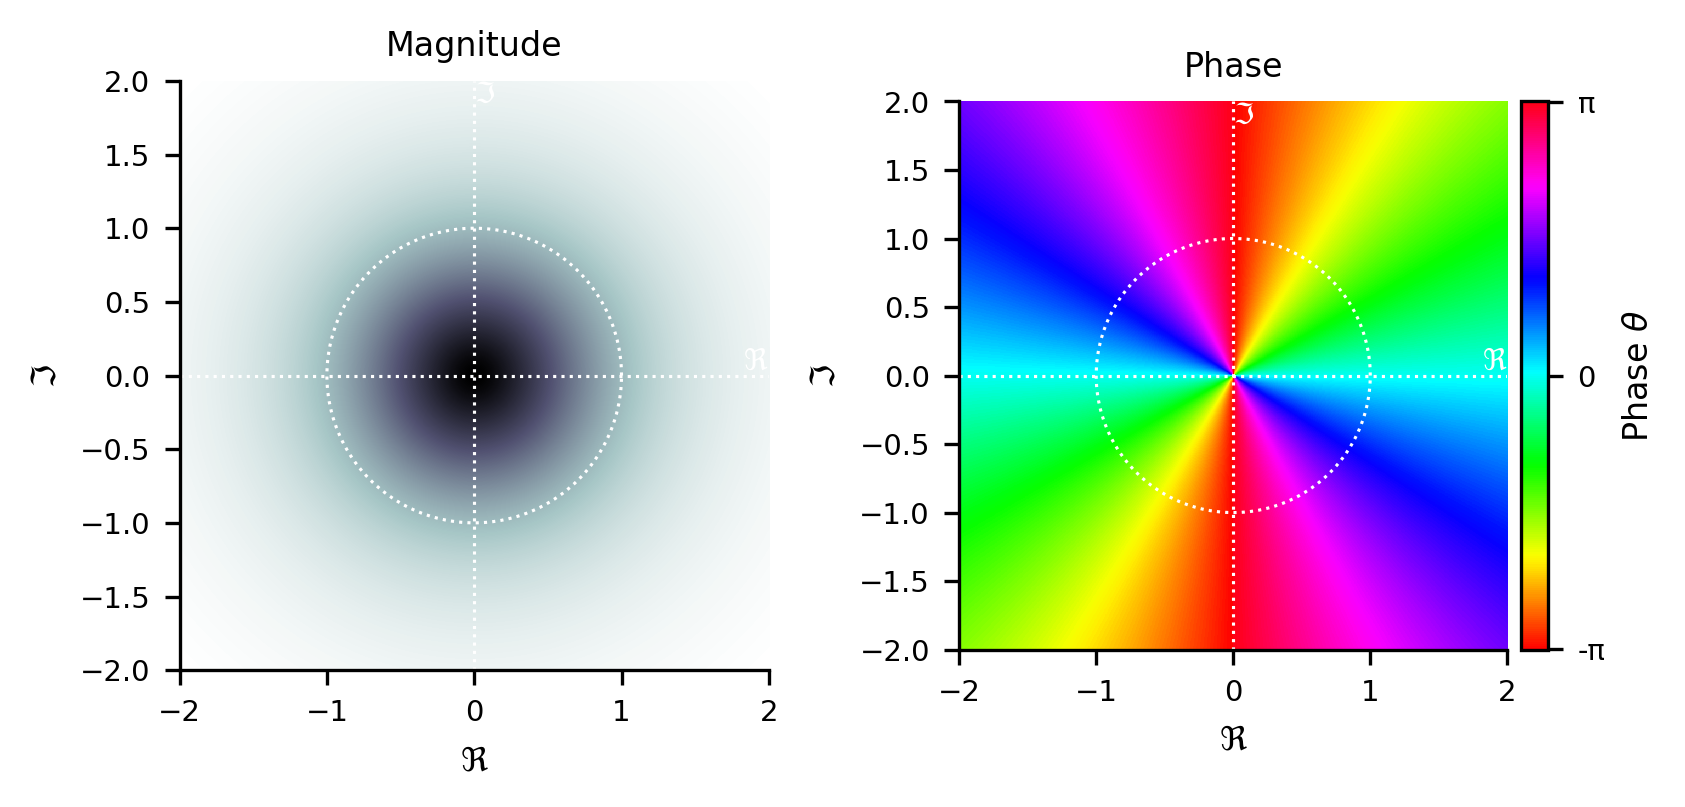

In [6]:
phase_magnitude_figure(z**2);

## Inverting (pole at 0)

Note that the phase rotation has reversed.

<ipython-input-7-d79fdb1d4025>:1: RuntimeWarning: divide by zero encountered in true_divide
  phase_magnitude_figure(1/z);
<ipython-input-7-d79fdb1d4025>:1: RuntimeWarning: invalid value encountered in true_divide
  phase_magnitude_figure(1/z);


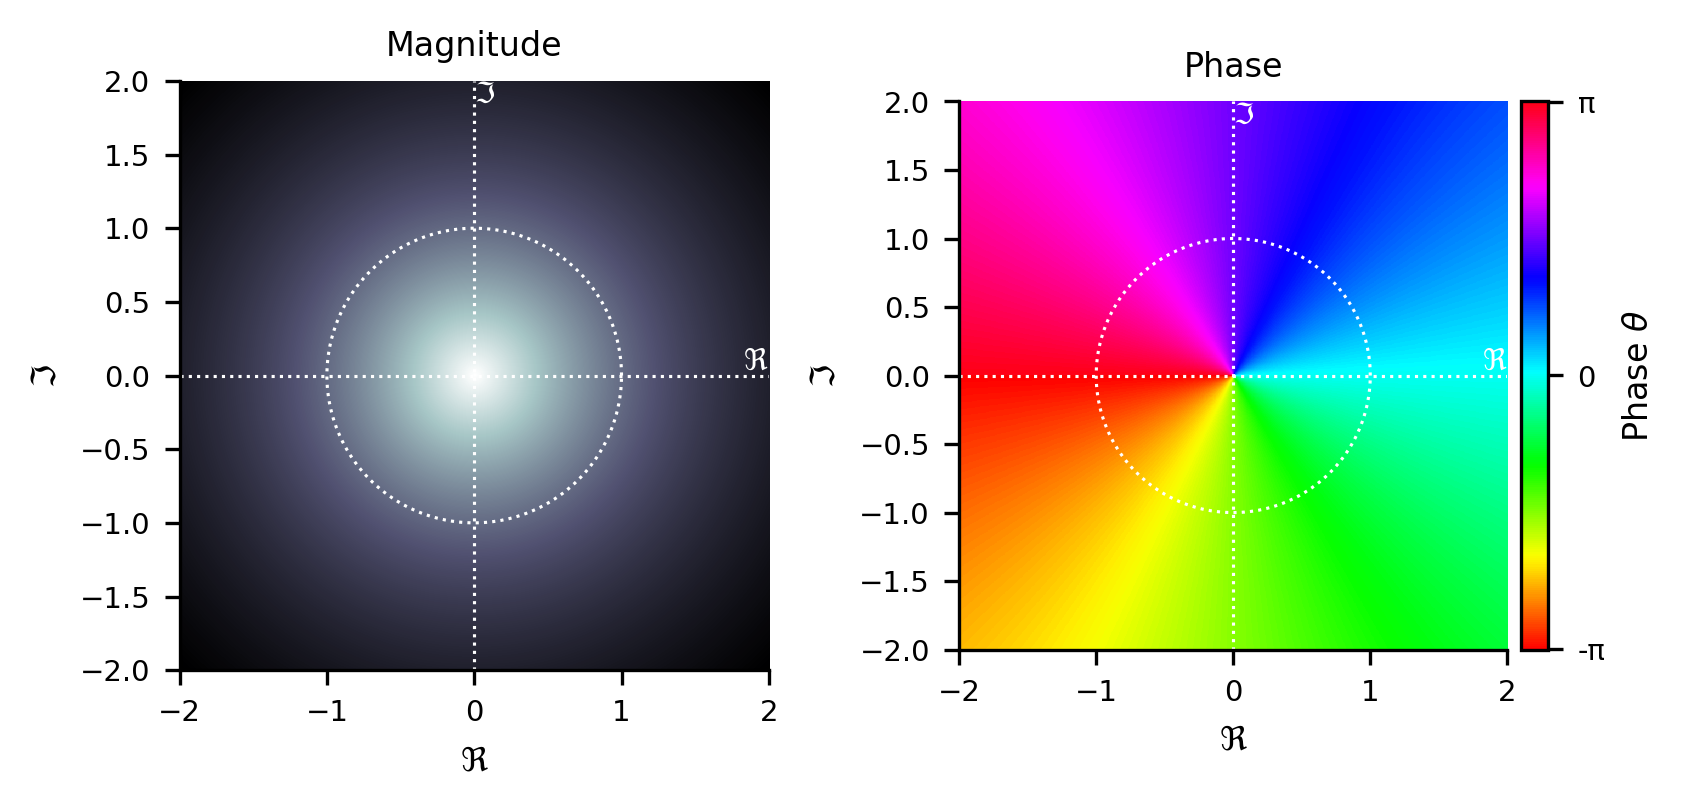

In [7]:
phase_magnitude_figure(1/z);

# Let's make an unstable conjugate pair z-domain transfer function

$$
U(z) = \frac 1 {(1 + \alpha e^{i\pi/4} z^{-1})(1 +  \alpha  e^{-i\pi/4} z^{-1})},\,\, \alpha < 1
$$

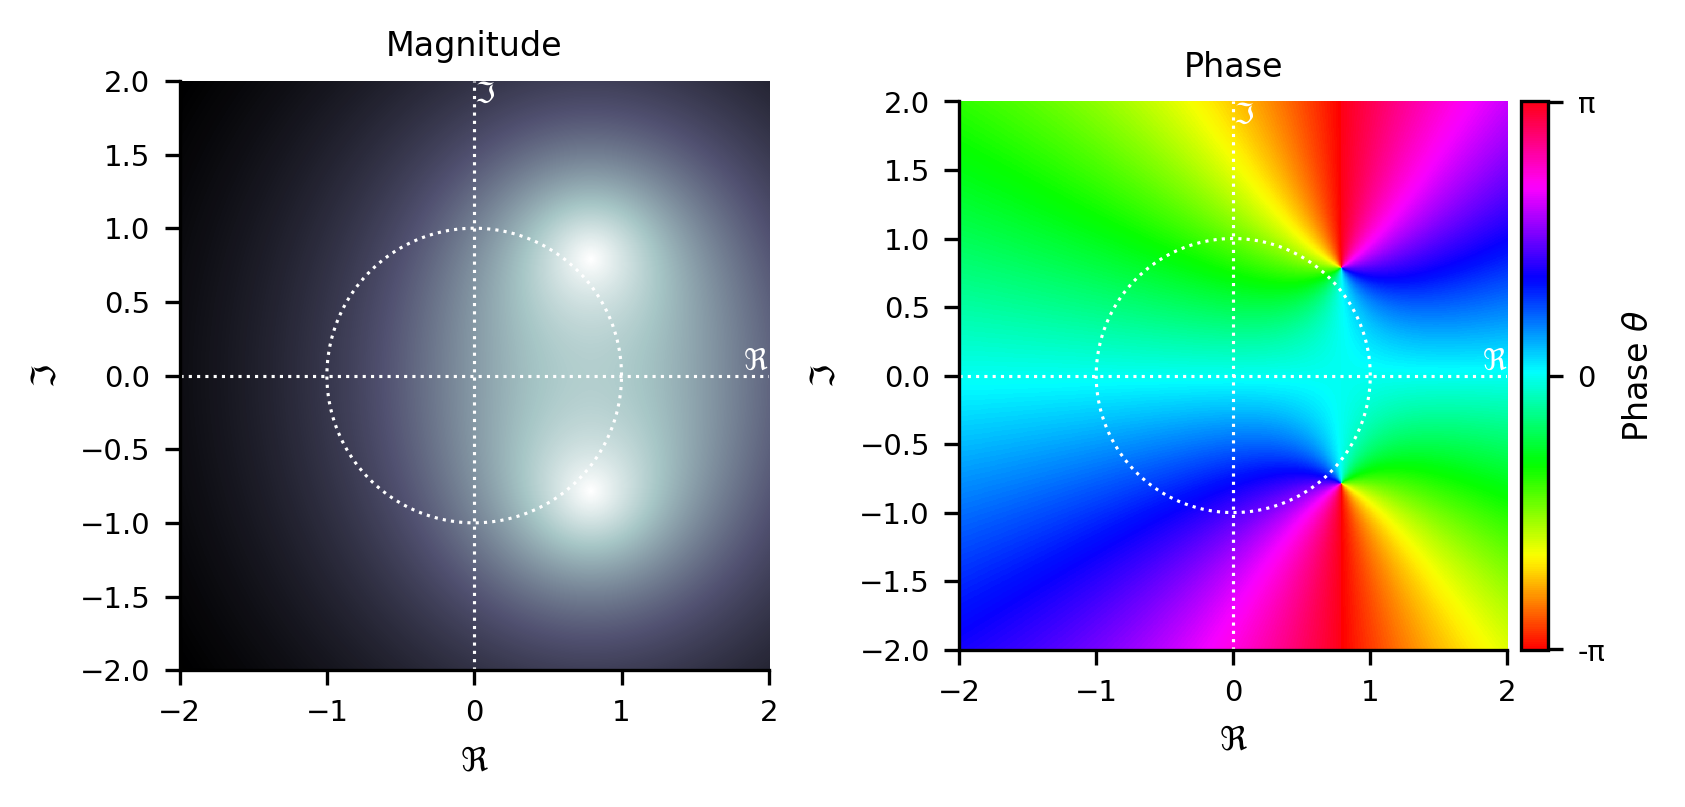

In [8]:
x = linspace(-2,2,1000)
z = x[None,:] + 1j*x[:,None]
α = 0.9
def Y(z):
    zeros = 1
    poles = (1-α*exp(1j*pi/4)*z)*(1-α*exp(-1j*pi/4)*z)
    return zeros/poles
y = Y(z)
phase_magnitude_figure(y);

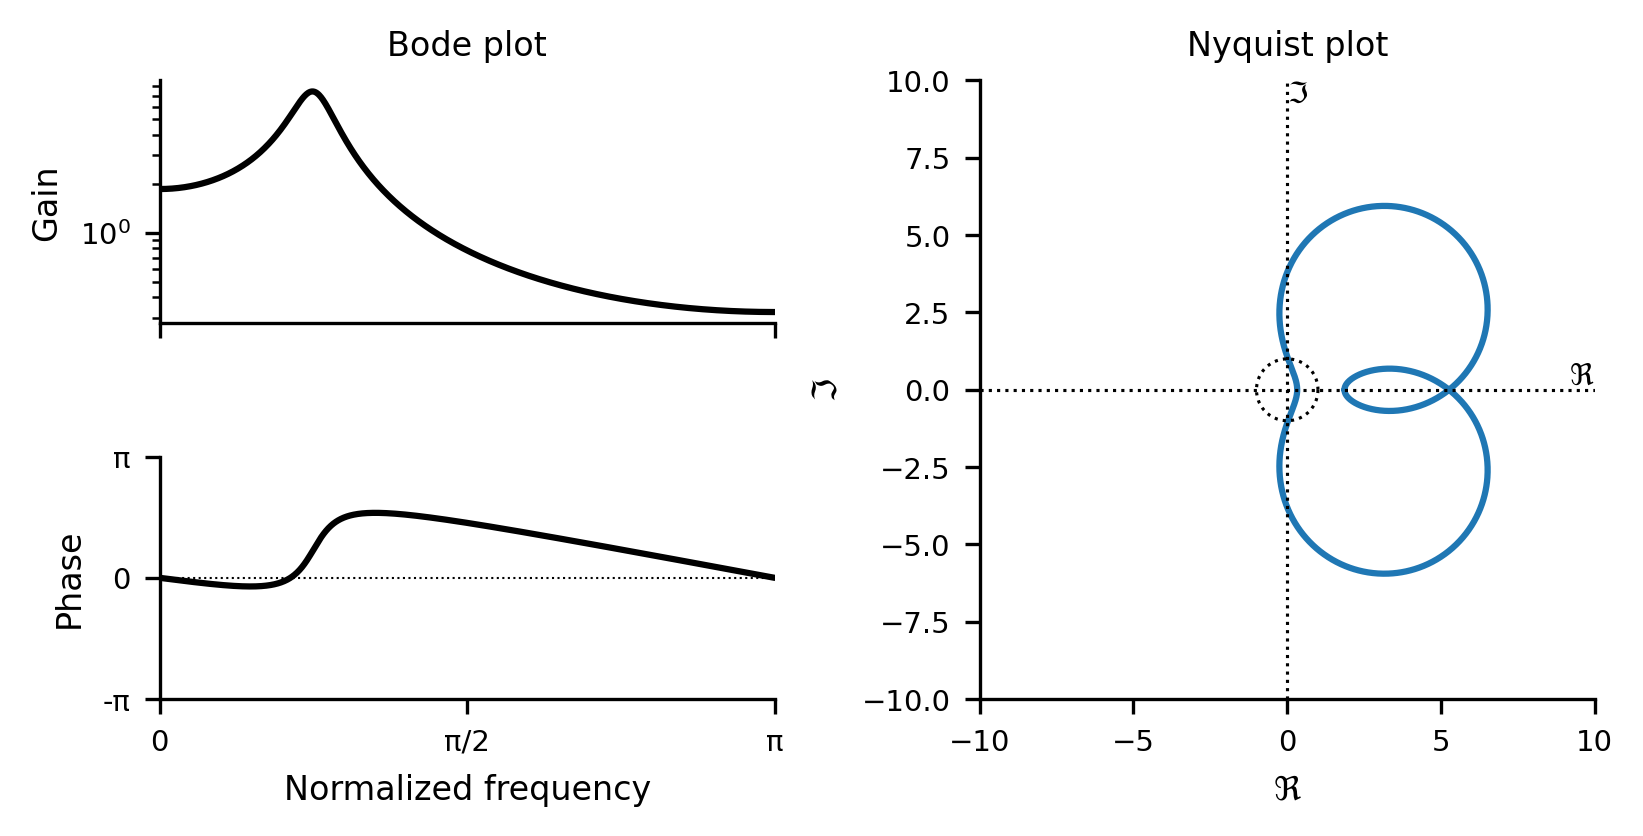

In [9]:
do_bode_and_nyquist(Y,extent=10);

## Phase rotation vanishes around regions that contain equal # zeros and poles

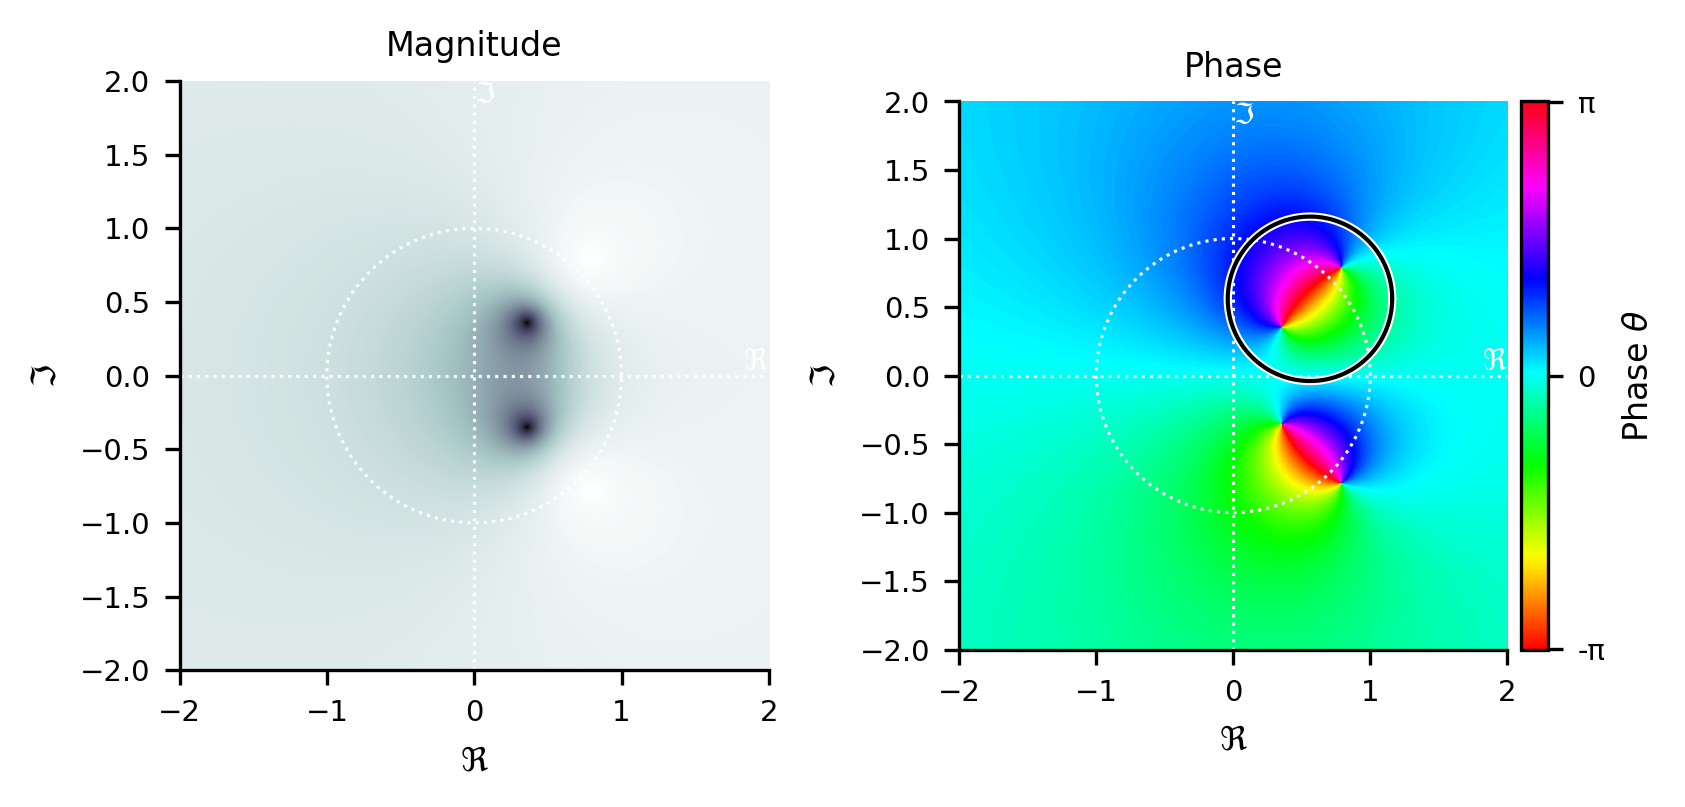

In [10]:
x = linspace(-2,2,1000)
z = x[None,:] + 1j*x[:,None]
α = 0.9
β = 2
def Y(z):
    zeros = (1-β*exp(1j*pi/4)*z)*(1-β*exp(-1j*pi/4)*z)
    poles = (1-α*exp(1j*pi/4)*z)*(1-α*exp(-1j*pi/4)*z)
    return zeros/poles
y = Y(z)
phase_magnitude_figure(y)

circle = exp(1j*linspace(0,2*pi,1000))
circle = 0.6*circle + (1+1j)*0.56
plot(circle.real,circle.imag,color='w',lw=2)
plot(circle.real,circle.imag,color='k',lw=1);

### Poles and zeros cancelling inside unit circle: Bode and Nyquist plots

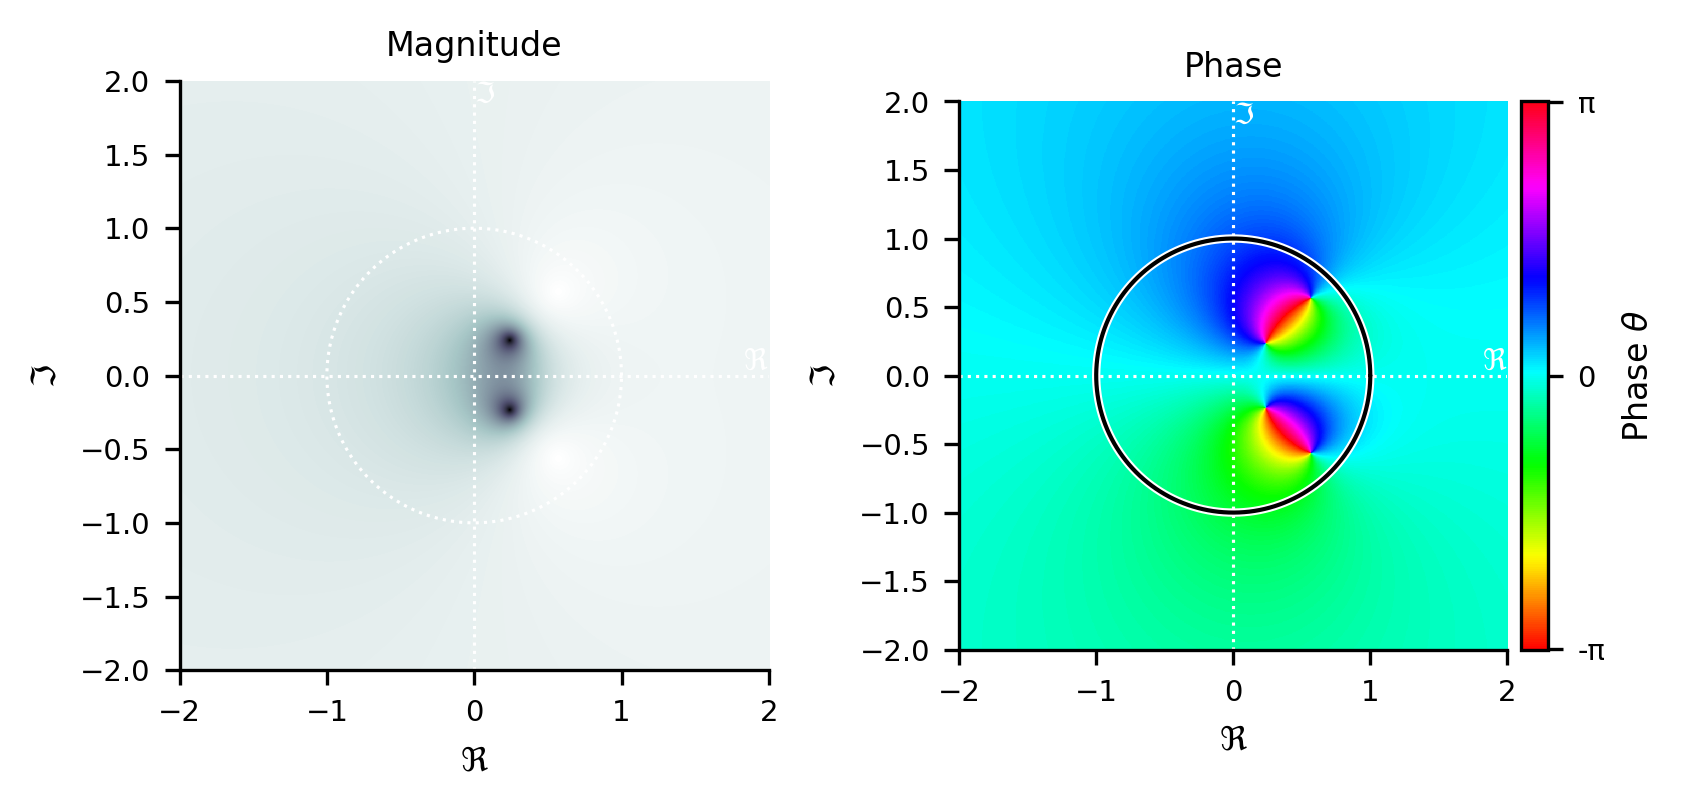

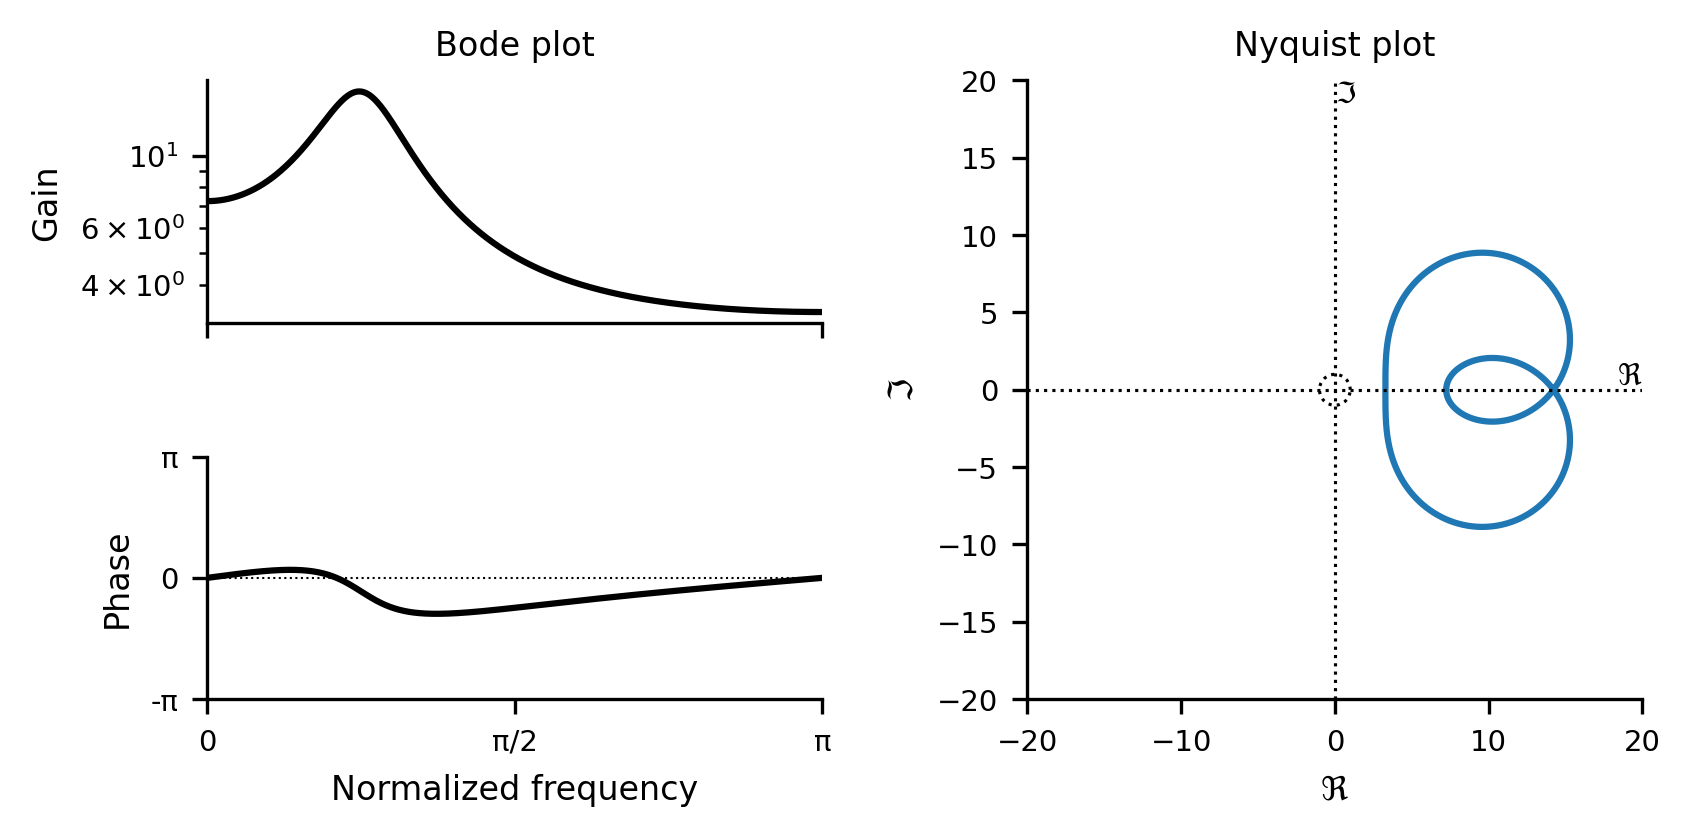

In [11]:
α = 1.25
β = 3
def Y(z):
    zeros = (1-β*exp(1j*pi/4)*z)*(1-β*exp(-1j*pi/4)*z)
    poles = (1-α*exp(1j*pi/4)*z)*(1-α*exp(-1j*pi/4)*z)
    return zeros/poles
y = Y(z)
phase_magnitude_figure(y)

circle = exp(1j*linspace(0,2*pi,1000))
plot(circle.real,circle.imag,color='w',lw=2)
plot(circle.real,circle.imag,color='k',lw=1);

do_bode_and_nyquist(Y,extent=20);

# Phase and magnitude together

We can plot the output of a function as a shaded color, where the hue represents the phase and the brightness the absolute magnitude. (We'll use this in a bit to visualize transormation in the complex plan in a single plot)

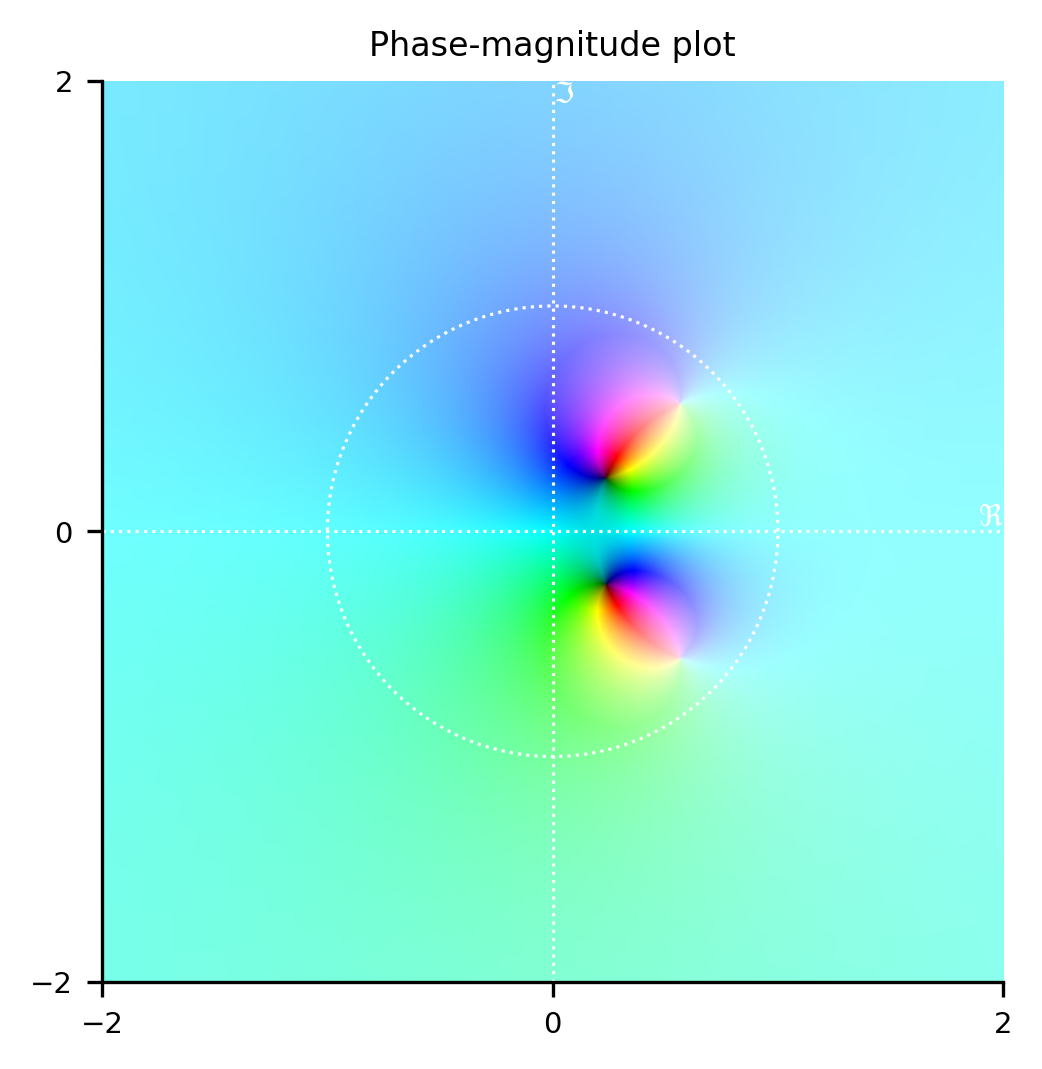

In [12]:
y = Y(z)
joint_phase_magnitude_plot(y);

### Just for fun: Fractals as  iterated polynomial maps

Just for fun: the iterated map $z_n = z_n^2 + c$ can generate Julia set fractals. Here's an example for $c = -0.81 + 0.05i$, iterated 7 times.

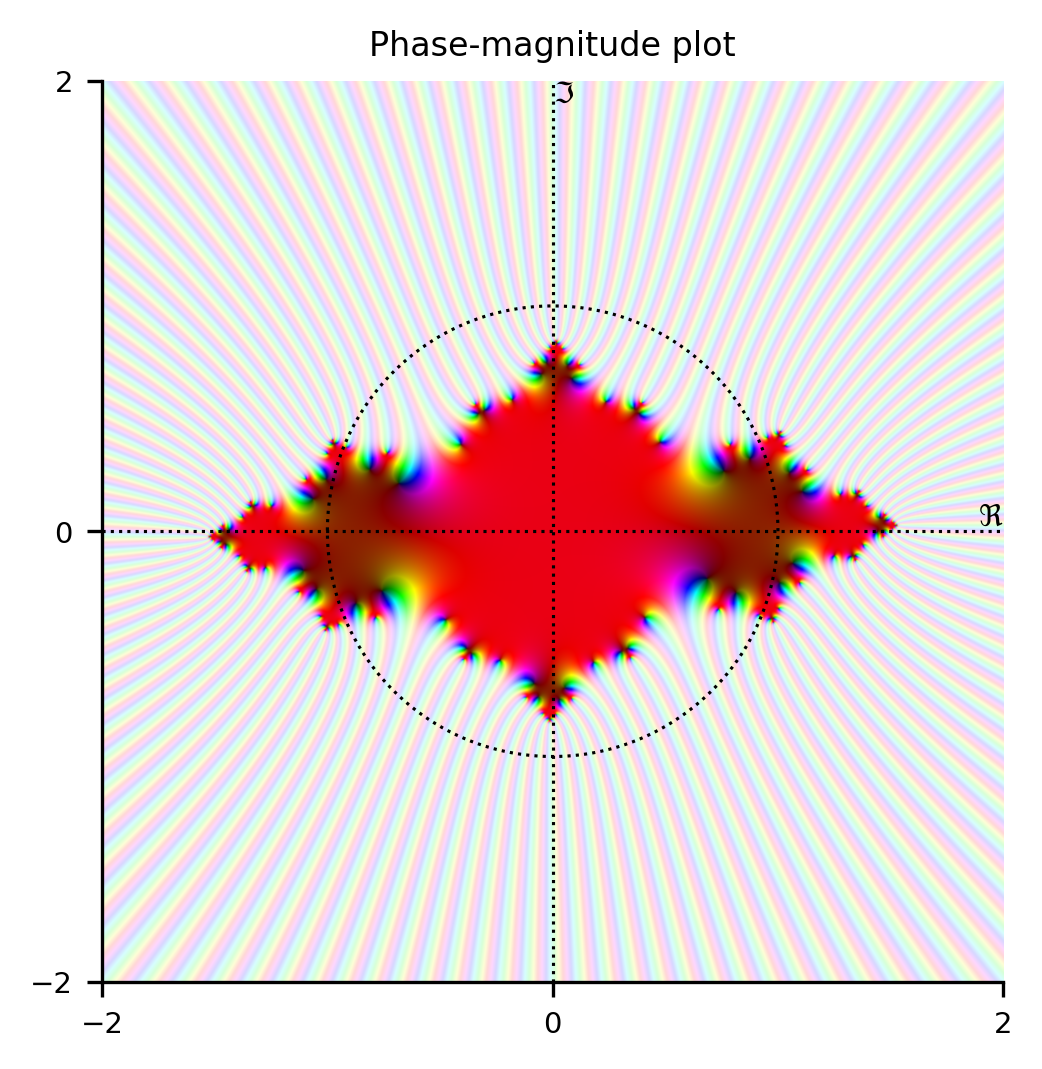

In [13]:
c = -0.81 + 0.05j
n = 7
def Y(z):
    for i in range(n):
        z = z**2 + c
    return z
y = Y(z)
#phase_magnitude_figure(y)
#figure()
joint_phase_magnitude_plot(y,color='k');

# Approximate conversions from Laplace to Z domain 

### Forward

$$
z = e^{sT} \approx 1 + sT
\Rightarrow
sT \approx z-1
$$

### Backward

$$
1/z = e^{-sT} \approx 1 - sT
\Rightarrow
sT \approx \frac{z-1}{z}
$$

### Tustin/Bilinear

$$
z = \frac {e^{\tfrac 1 2 sT}}{e^{-\tfrac 1 2 sT}} \approx \frac {1 + \tfrac 1 2 sT} {1 - \tfrac 1 2 sT}
\Rightarrow
sT \approx 2\frac {z-1}{z + 1}
$$

## Applying each of these transformations in the complex plane... 

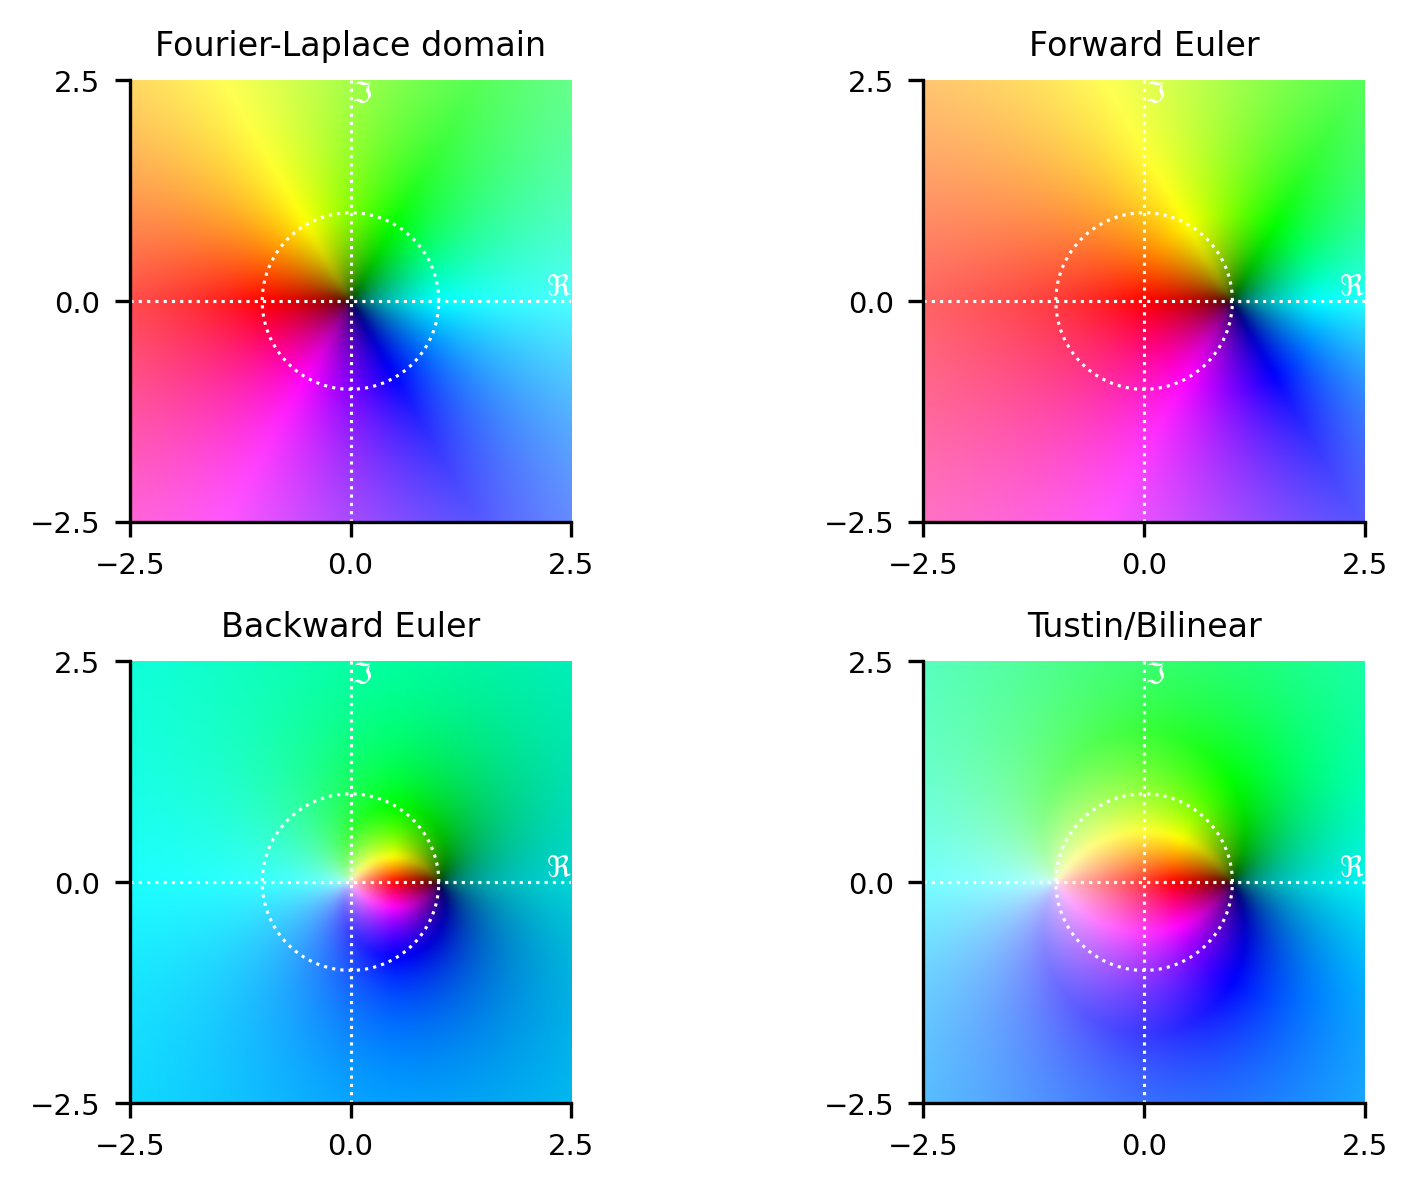

In [14]:
T = 1
k = 2.5
x = linspace(-k,k,100)
limit = [(-k,k),(-k,k)]
z = x[None,:] + 1j*x[:,None]
def Y(z):
    return z
figure()
subplot2grid((2,2),(0,0))
joint_phase_magnitude_plot(Y(z),limit=limit)
title('Fourier-Laplace domain')
subplot2grid((2,2),(0,1))
joint_phase_magnitude_plot(Y((z-1)/T),limit=limit)
title('Forward Euler')
subplot2grid((2,2),(1,0))
joint_phase_magnitude_plot(Y((z-1)/z/T),limit=limit)
title('Backward Euler')
subplot2grid((2,2),(1,1))
joint_phase_magnitude_plot(Y(2*(z-1)/(z+1)/T),limit=limit)
title('Tustin/Bilinear')
tight_layout();

## Applied to a Laplace domain transfer function w. two conjugate pair poles

- All transfomations introduce some error
- Forward Euler can be unstable
- Backward Euler 
    - Maps the point at $\infty$ to 0
    - Preserves stability
    - Can distort frequences and phase response
- Tustin transformation 
    - Maps the point at $\infty$ to -1
    - Preserves stability
    - Can distort frequences and phase responses
- Transforming poles and zeros
    - Poorly approximates the linear time-invariant frequency response

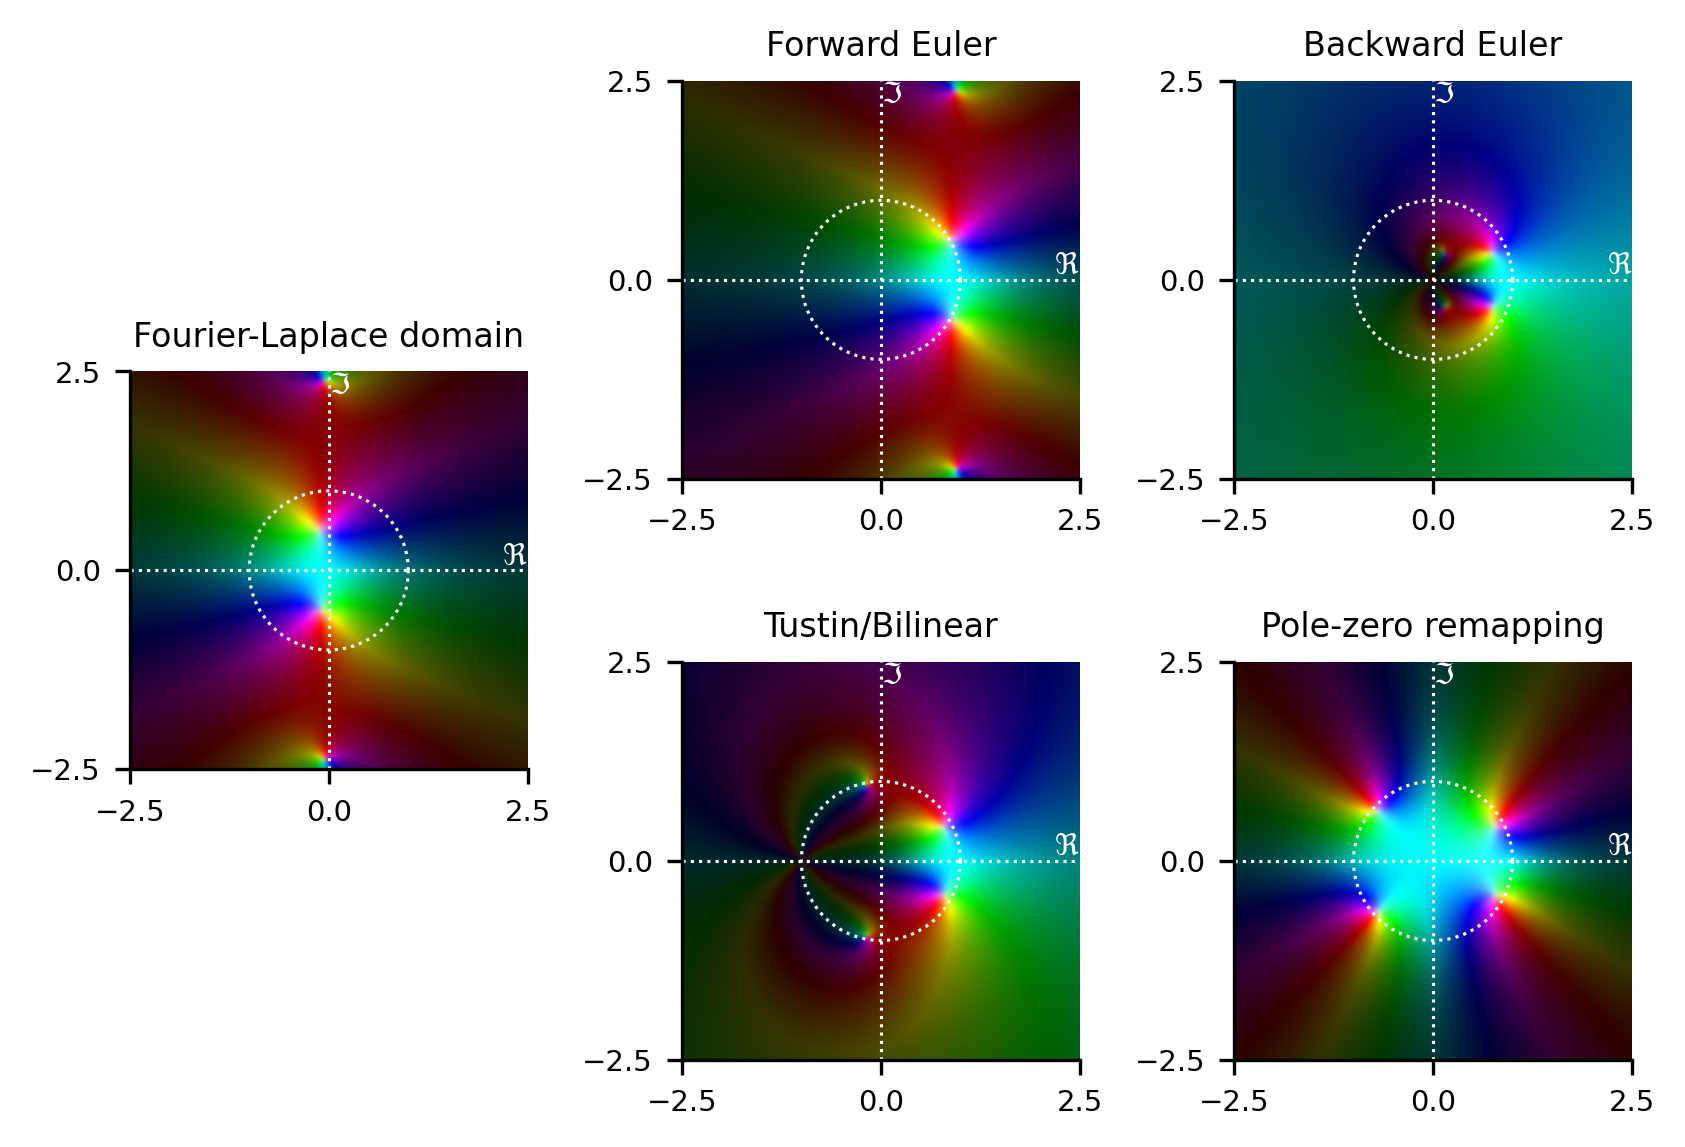

In [15]:
T = 1
k = 2.5
x = linspace(-k,k,100)
limit = [(-k,k),(-k,k)]
z = x[None,:] + 1j*x[:,None]
p1 = -0.1+0.5j
p2 = -0.05+2.4j
# Note: this is the continuous time (s-domain) 
# function. Converted to z-domain through
# various transforms below
def Y(z):
    poles = (1-z/p1)*(1-z/conj(p1))*(1-z/p2)*(1-z/conj(p2))
    return 1/poles
figure()
subplot2grid((4,3),(1,0),rowspan=2)
joint_phase_magnitude_plot(Y(z),limit=limit)
title('Fourier-Laplace domain')
subplot2grid((4,3),(0,1),rowspan=2)
joint_phase_magnitude_plot(Y((z-1)/T),limit=limit)
title('Forward Euler')
subplot2grid((4,3),(0,2),rowspan=2)
joint_phase_magnitude_plot(Y((z-1)/z/T),limit=limit)
title('Backward Euler')
subplot2grid((4,3),(2,1),rowspan=2)
joint_phase_magnitude_plot(Y(2*(z-1)/(z+1)/T),limit=limit)
title('Tustin/Bilinear')
def Yz(z):
    r1 = exp(p1*T)
    r2 = exp(p2*T)
    poles = (1-z/r1)*(1-z/conj(r1))*(1-z/r2)*(1-z/conj(r2))
    return 1/poles
subplot2grid((4,3),(2,2),rowspan=2)
joint_phase_magnitude_plot(Yz(z),limit=limit)
title('Pole-zero remapping') # a.k.a. Matched Z-transform method
tight_layout();

## Comparing frequency domain responses

Note that, even through the system attained via forward Euler is unstable, it still appears to have a reasonable frequency response. This is because we cannot tell whether the poles are inside or outside the unit circle from the frequency response alone, and highlights the importance of checking the stability before interpreting freqeuency reponse plots. 

( In these plots, we use an arbitrary (normalized) frequency, and set the sampling rate of the discrete system to be twice this unit frequency (T=0.5) )

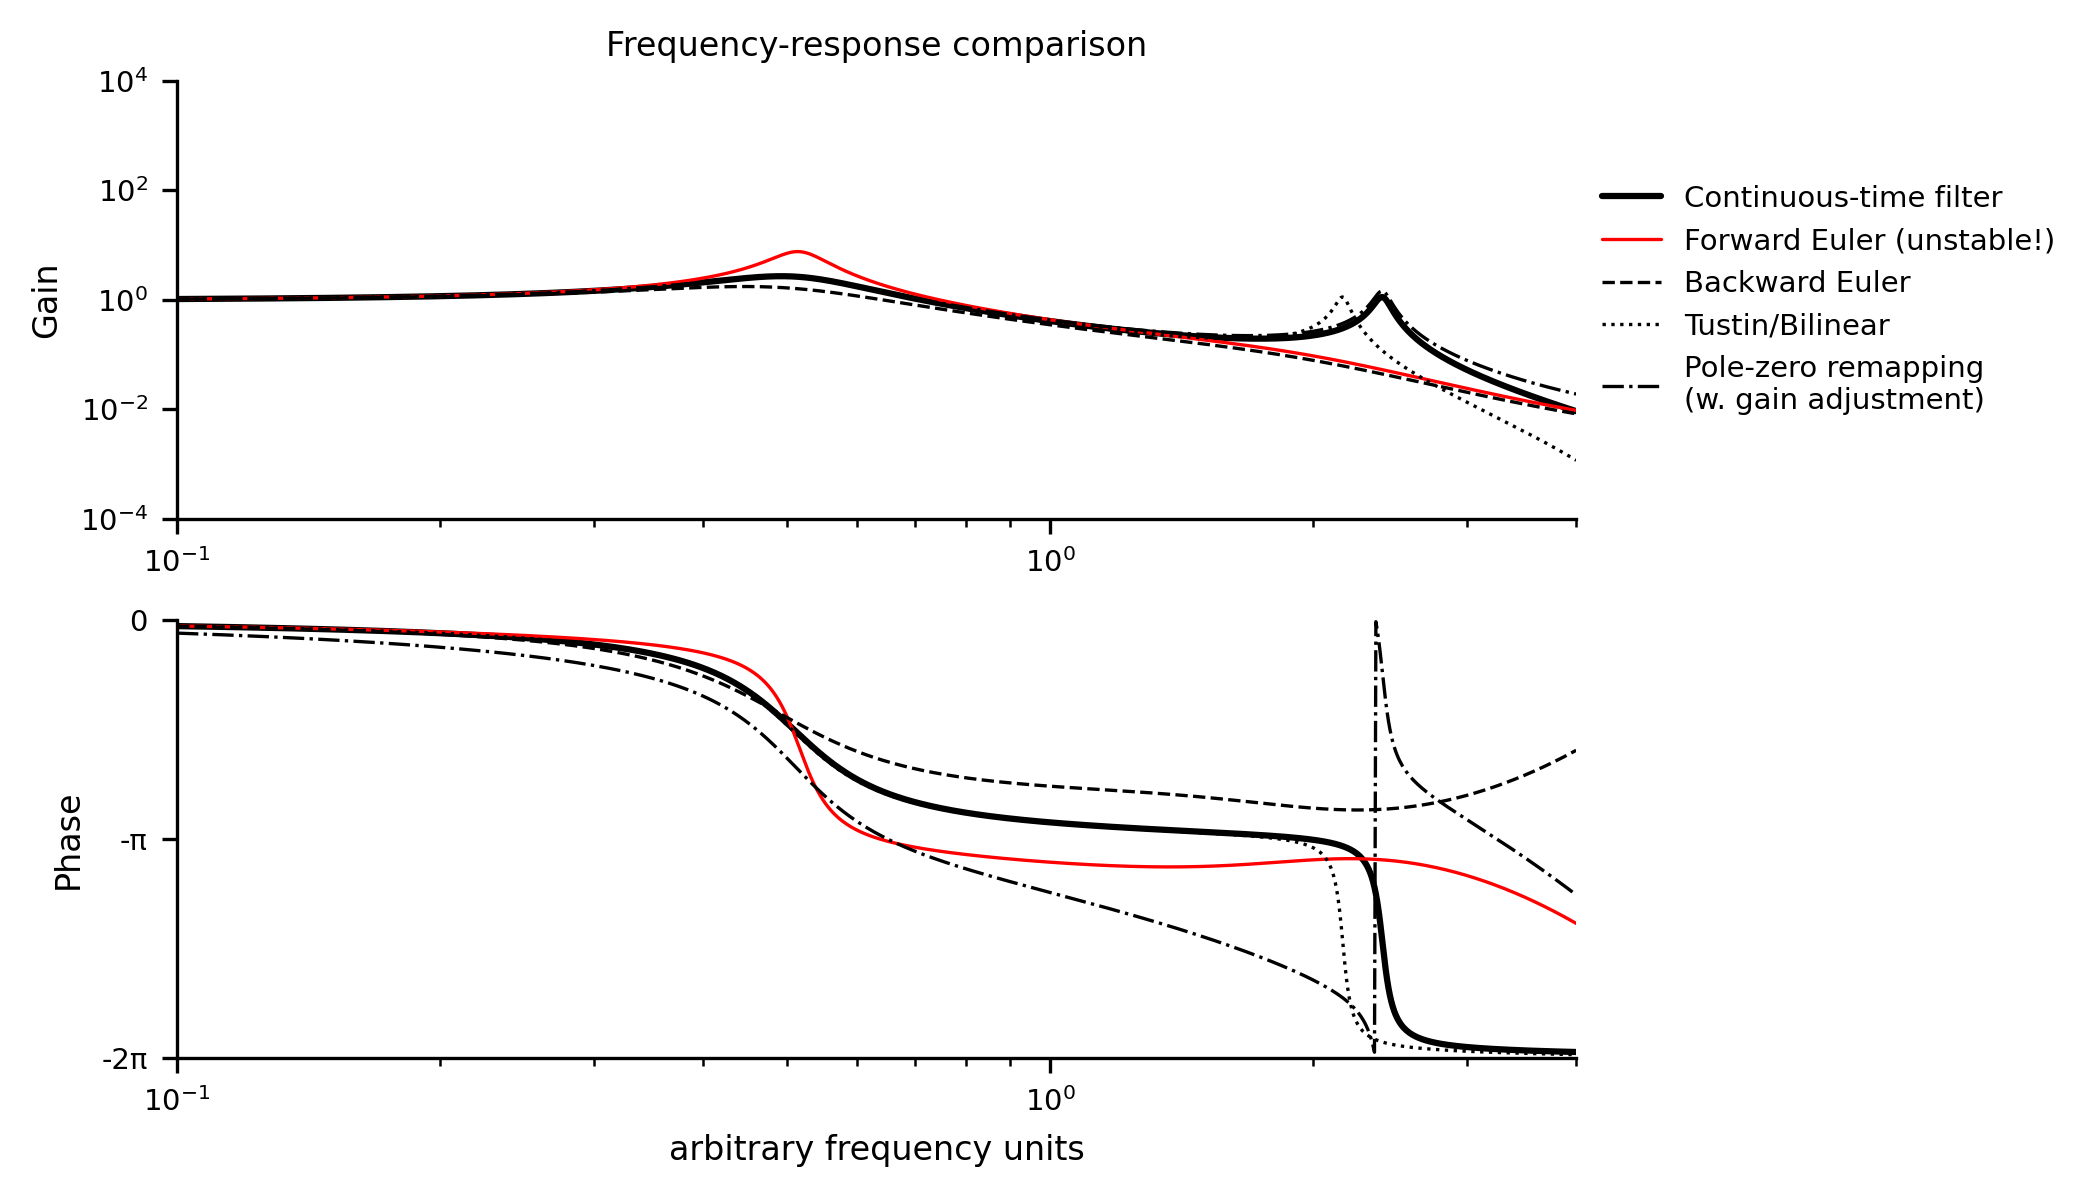

In [16]:
T = 0.5
k = 2.5
def Y(z):
    poles = (1-z/p1)*(1-z/conj(p1))*(1-z/p2)*(1-z/conj(p2))
    return 1/poles
figure(figsize=(7,4))
ax1 = subplot2grid((2,1),(0,0),rowspan=1)
ax2 = subplot2grid((2,1),(1,0),rowspan=1)
ω = 10**linspace(-1,log10(1/T)*2,1000)
w0 = Y(1j*ω)
do_bode_s(ω,w0,ax1,ax2,'Continuous-time filter',lw=1.5)
z = exp(1j*ω*T)
w = Y((z-1)/T) 
do_bode_s(ω,w,ax1,ax2,'Forward Euler (unstable!)',color='r',linestyle='-')
w = Y((z-1)/z/T)
do_bode_s(ω,w,ax1,ax2,'Backward Euler',color='k',linestyle='--')
w = Y(2*(z-1)/(z+1)/T)
do_bode_s(ω,w,ax1,ax2,'Tustin/Bilinear',color='k',linestyle=':')
def Yz(z):
    r1 = exp(p1*T)
    r2 = exp(p2*T)
    poles = (1-z/r1)*(1-z/conj(r1))*(1-z/r2)*(1-z/conj(r2))
    return 1/poles
w = Yz(z)
w /= abs(w[0])/abs(w0[0])
do_bode_s(ω,w,ax1,ax2,'Pole-zero remapping\n(w. gain adjustment)',color='k',linestyle='-.')
xlabel('arbitrary frequency units')
sca(ax1)
title('Frequency-response comparison')
ylim(1e-4,1e4)
tight_layout();

## Extra example 1

$$
\frac{10^{-4} z^3}{(z-1)(1.15z^2-2.05z+1)}
$$

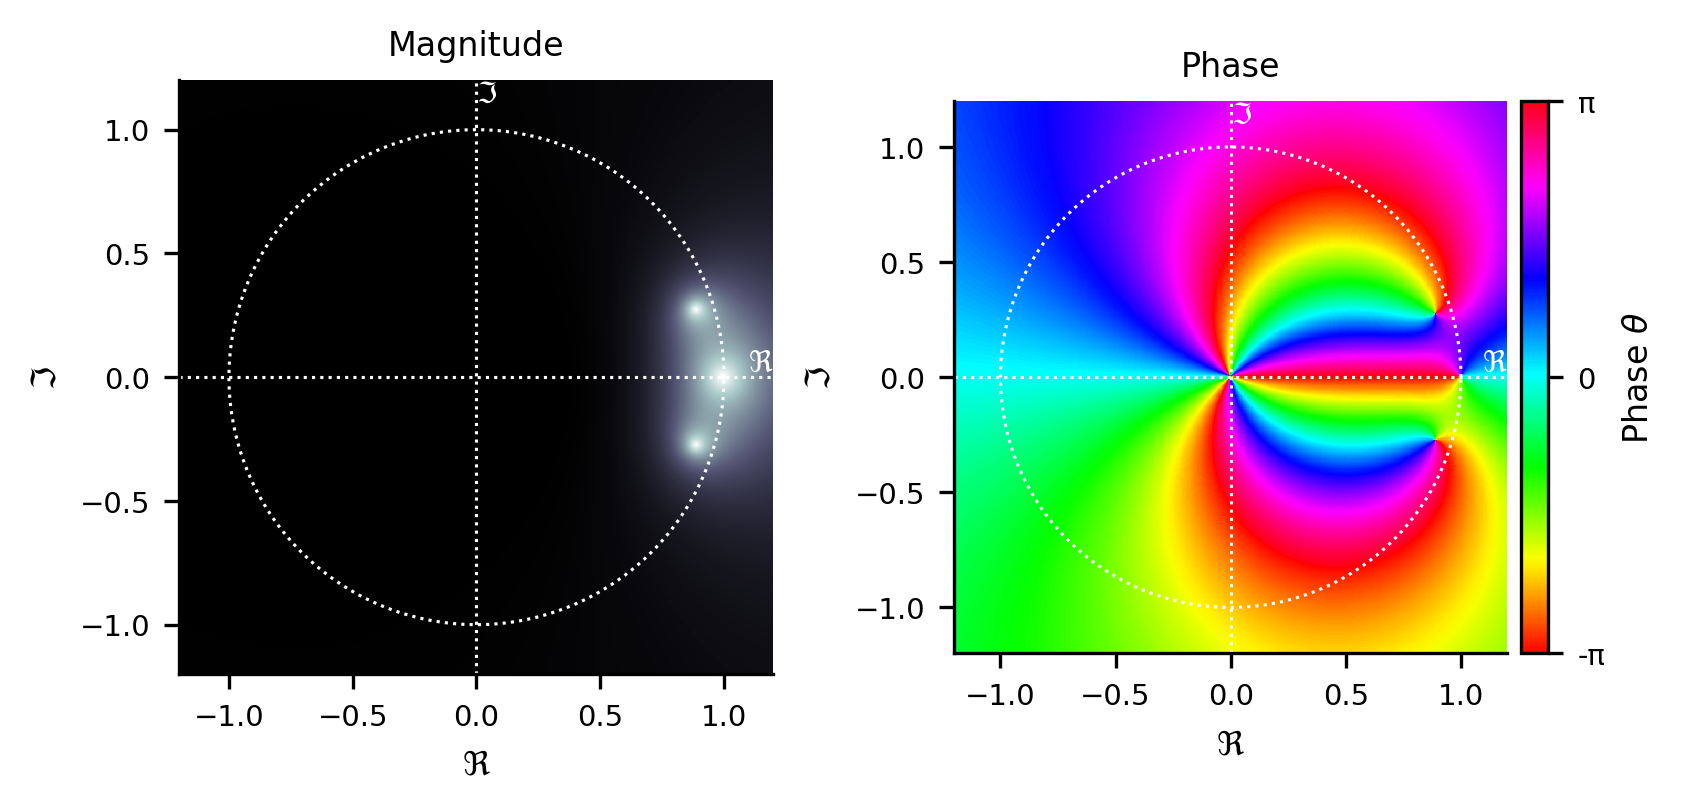

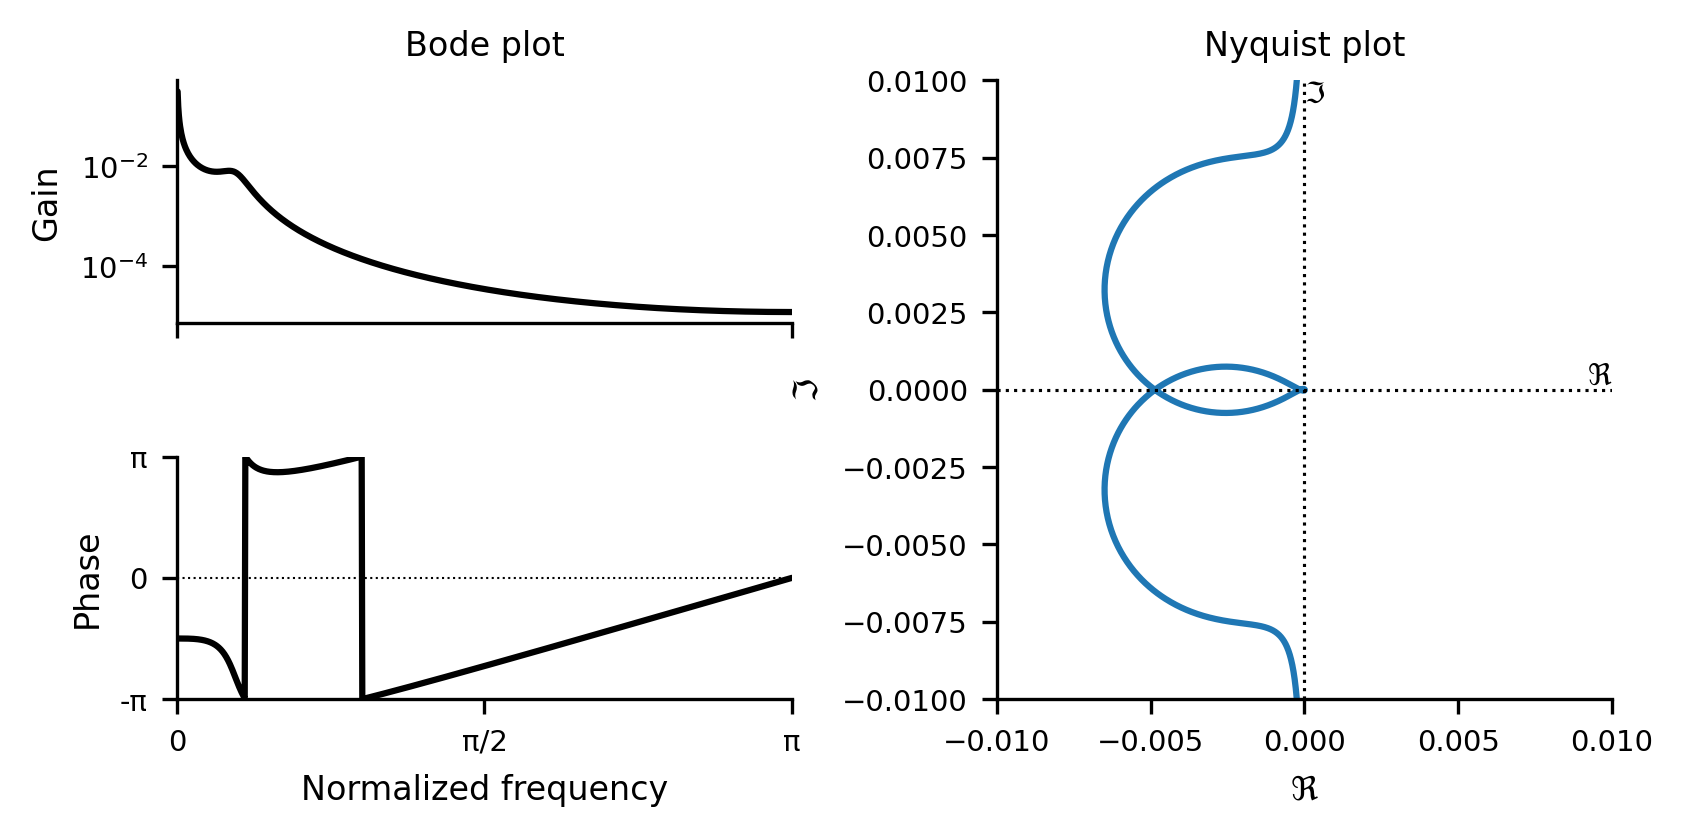

In [17]:
np.seterr(divide='ignore', invalid='ignore')

# Define complex grid
k = 1.2
x = linspace(-k,k,500)
limit = [(-k,k),(-k,k)]
z = x[None,:] + 1j*x[:,None]

def Y(z):
    z = complex256(z)
    n = 10**-4*z**3
    d = (z-1)*(1.15*z**2-2.05*z+1)
    ζ = n/d
    return complex64(ζ)
phase_magnitude_figure(Y(z)*100,limit=k)

ax1,ax2,ax3 = do_bode_and_nyquist(Y,extent=1e-2)
sca(ax3)
#xlim(-1e-1,1e-1)

## Extra example 2

$$
\frac 1 {z^2(z-1)}
$$

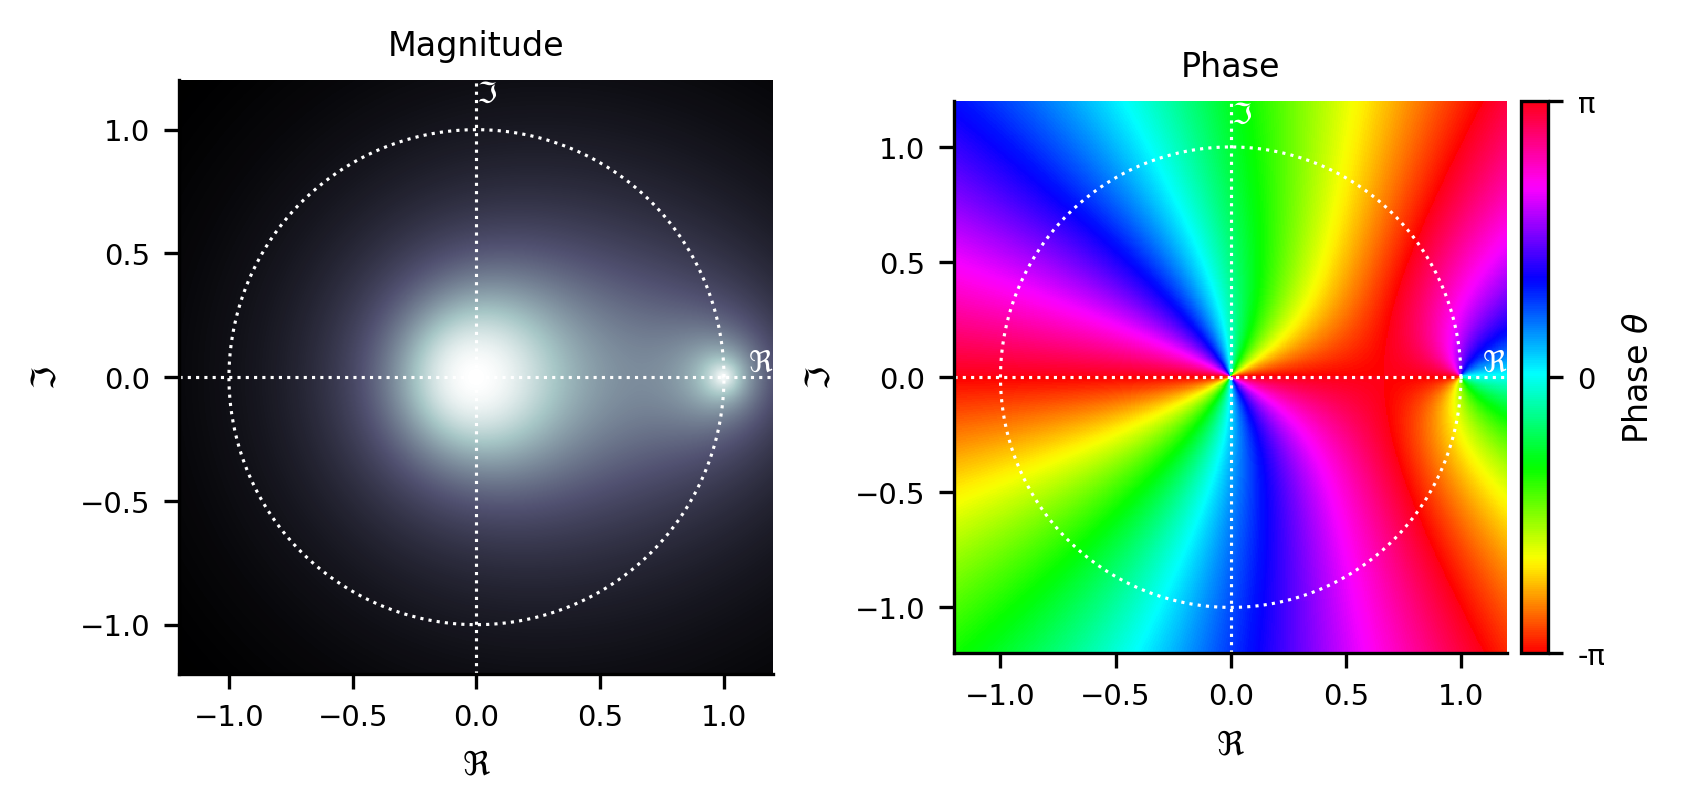

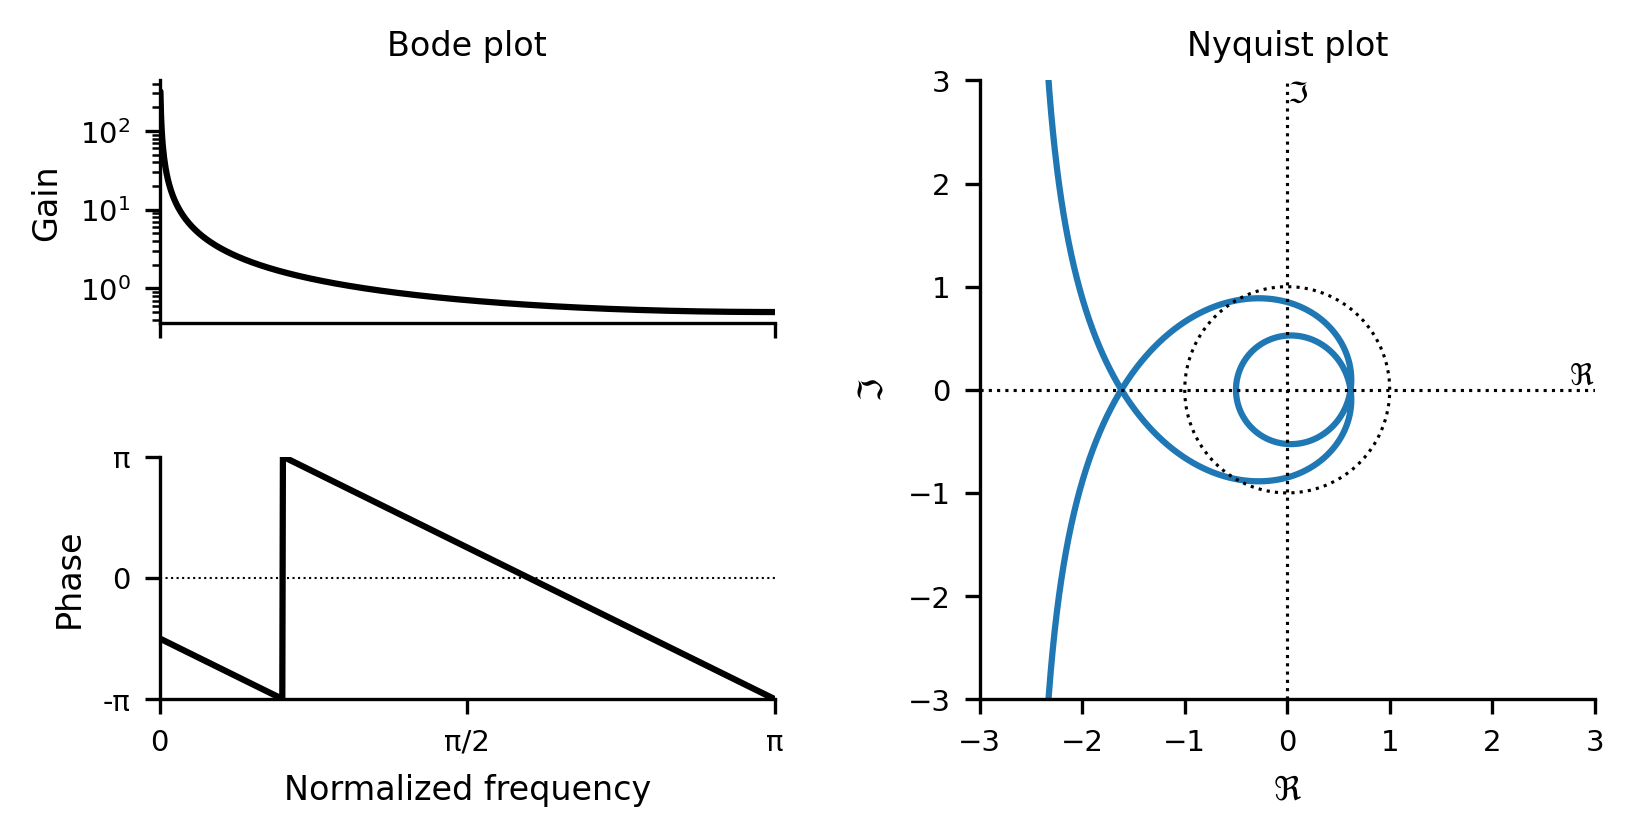

In [18]:
np.seterr(divide='ignore', invalid='ignore')

# Define complex grid
k = 1.2
x = linspace(-k,k,500)
limit = [(-k,k),(-k,k)]
z = x[None,:] + 1j*x[:,None]

def Y(z):
    z = complex256(z)
    ζ = 1/(z*z*(z-1))
    return complex64(ζ)
phase_magnitude_figure(Y(z)/10,limit=k)

do_bode_and_nyquist(Y,extent=3);